In [33]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [34]:
# This section of code is adapted from the "Building a DIY Multimodal Question Answering System with Vertex AI" tutorial
# Original Author: Lavi Nigam, Google Cloud
# Modifications (author Emanuele Pedrona): 

#Adapted the code to work with a custom PDF (SaidText pitch PDF).
#Added specific examples and customizations for prompt questions to Gemini regarding SaidText.

# Building a DIY Multimodal Question Answering System with Vertex AI (A Beginner's Guide - Multimodal RAG)

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/qa-ops/building_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fqa-ops%2Fbuilding_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/qa-ops/building_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/qa-ops/building_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
</table>

| | |
|-|-|
|Author(s) | [Lavi Nigam](https://github.com/lavinigam-gcp) |

<div class="alert alert-block alert-warning">
<b>⚠️ This is a new version of the old mRAG notebook with modifications and new data. You can refer to the old notebook here:  ⚠️</b>
</div>

[**intro_multimodal_rag.ipynb**](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intro_multimodal_rag.ipynb)

## Overview


This guide is your hands-on introduction to creating a question answering system that understands both text and images. We'll build this system from the ground up using Google's Vertex AI, giving you a clear understanding of how it works without relying on complex third-party tools.


## Why Build It Yourself?

Large Language Models (LLMs) are powerful, but they can seem like a "black box". By building our own system, we'll break open that box and explore the core concepts. This will give you the knowledge to customize and optimize every aspect of your question answering system, whether you ultimately choose to code everything yourself or use external libraries.


## What We'll Do:

* **Focus on Fundamentals**: We'll start with the essential design pattern of "Retrieval Augmented Generation" (RAG) – a way to find and use relevant information to answer questions.

* **Work with Text and Images**: We'll expand RAG to handle both text and images found in PDF documents. Future guides in this series will explore even more types of data, like videos and audio.

* **Use Vertex AI**: We'll only use Google's Vertex AI Embeddings API and Gemini API, ensuring you have complete control and understanding of the building blocks.


By the end of this guide, you'll have a solid foundation in building multimodal question answering systems, empowering you to create smarter applications that can understand and respond to a wider range of information.


### Gemini

Gemini is a family of generative AI models developed by Google DeepMind that is designed for multimodal use cases. The Gemini API gives you access to the Gemini 1.0 Pro Vision, Gemini 1.0 Pro & Gemini 1.5 Pro models.

### Comparing text-based and multimodal RAG

Multimodal RAG offers several advantages over text-based RAG:

1. **Enhanced knowledge access:** Multimodal RAG can access and process both textual and visual information, providing a richer and more comprehensive knowledge base for the LLM.
2. **Improved reasoning capabilities:** By incorporating visual cues, multimodal RAG can make better informed inferences across different types of data modalities.

This notebook shows you how to implement DIY RAG with Vertex AI Gemini API
 and Vertex AI Embeddings API; [text embeddings](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text-embeddings), and [multimodal embeddings](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/multimodal-embeddings), to build a document search engine.

Through hands-on examples, you will discover how to construct a multimedia-rich metadata repository of your document sources, enabling search, comparison, and reasoning across diverse information streams.

### Objectives

This notebook provides a guide to building a document search engine using multimodal retrieval augmented generation (RAG), step by step:

1. Extract and store metadata of documents containing both text and images, and generate embeddings the documents
2. Search the metadata with text queries to find similar text or images
3. Search the metadata with image queries to find similar images
4. Using a text query as input, search for contextual answers using both text and images

### Costs

This tutorial uses billable components of Google Cloud:

- Vertex AI

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.


## Getting Started


### Install Vertex AI SDK for Python and other dependencies


In [1]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf rich

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information


In [2]:
# Define project information

import sys

PROJECT_ID = ""  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on Colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: vertexai-test1-414909


In [3]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [4]:
from rich import print as rich_print
from rich.markdown import Markdown as rich_Markdown
from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)
from vertexai.language_models import TextEmbeddingModel
from vertexai.vision_models import MultiModalEmbeddingModel

### Load the Gemini 1.5 Pro, Gemini 1.5 Pro Flash, Gemini 1.0 Pro Vision and Gemini 1.0 Pro models


Learn more about each models and their differences: [here](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/send-multimodal-prompts)

Learn about the quotas: [here](https://cloud.google.com/vertex-ai/generative-ai/docs/quotas)

In [5]:
# Instantiate text model with appropriate name and version
text_model = GenerativeModel("gemini-1.0-pro")  # works with text, code

# Multimodal models: Choose based on your performance/cost needs
multimodal_model_15 = GenerativeModel(
    "gemini-1.5-pro-001"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - complex reasoning

# Multimodal models: Choose based on your performance/cost needs
multimodal_model_15_flash = GenerativeModel(
    "gemini-1.5-flash-001"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - faster inference

multimodal_model_10 = GenerativeModel(
    "gemini-1.0-pro-vision-001"
)  # works with text, code, video(without audio) and images with 16k input context

# Load text embedding model from pre-trained source
text_embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-004")

# Load multimodal embedding model from pre-trained source
multimodal_embedding_model = MultiModalEmbeddingModel.from_pretrained(
    "multimodalembedding"
)  # works with image, image with caption(~32 words), video, video with caption(~32 words)

#### Get pdf file

In [6]:
# download documents and images used in this notebook - will take ~30 sec
#!gsutil -m -q rsync -r gs://github-repo/rag/intro_multimodal_rag/intro_multimodal_rag_v2 .
#print("Download completed")

## Building metadata of documents containing text and images

### The data

The source data that you will use in this notebook are:


* [Google Cloud TPU Scaling blog](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/Google%20Cloud%20TPU%20blog.pdf)
* [Gemini 1.5 Technical Report](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/gemini_v1_5_report_technical.pdf)
* [Google Gemma Technical Paper](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/gemma_technical_paper.pdf)
* [Med-Gemini Technical Paper](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/med_gemini.pdf)



You can also use your data, by first deleting the current files and then placing your files in the `data/` folder.

### Import helper functions to build metadata

Before building the Multimodal Question Answering System with Vertex AI, it's important to have metadata of all the text and images in the document. For references and citations purposes, the metadata should contain essential elements, including page number, file name, image counter, and so on. Hence, as a next step, you will generate embeddings from the metadata, which is required to perform similarity search when querying the data.

In [7]:
from multimodal_qa_with_rag_utils import (
    get_document_metadata,
    set_global_variable,
)

set_global_variable("text_embedding_model", text_embedding_model)
set_global_variable("multimodal_embedding_model", multimodal_embedding_model)

 You can also view the code (`multimodal_qa_with_rag_utils`) [directly](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/utils/multimodal_qa_with_rag_utils.py).

### Extract and store metadata of text and images from a document

You just imported a function called `get_document_metadata()`. This function extracts text and image metadata from a document, and returns two dataframes, namely *text_metadata* and *image_metadata*, as outputs. If you want to find out more about how `get_document_metadata()` function is implemented using Gemini and the embedding models, you can take look at the [source code](https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/intro_multimodal_rag_utils.py) directly.

The reason for extraction and storing both text metadata and image metadata is that just by using either of the two alone is not sufficient to come out with a relevent answer. For example, the relevant answers could be in visual form within a document, but text-based RAG won't be able to take into consideration of the visual images. You will also be exploring this example later in this notebook.


At the next step, you will use the function to extract and store metadata of text and images from a document. Please note that the following cell may take a few minutes to complete:

**NOTE: Given that we are loading 4 files with roughly 200 pages and approximately 84 images, the cell below will take approximately 7 minutes to run. We recommend loading pre-computed metadata instead.**

In [8]:
%%time
# Specify the PDF folder with multiple PDF ~7m

print(
    "Removing pre-existing images folder, since you are running the logic from scratch"
)
! rm -rf images/

pdf_folder_path = "data/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
# image_description_prompt = """Explain what is going on in the image.
# If it's a table, extract all elements of the table.
# If it's a graph, explain the findings in the graph.
# Do not include any numbers that are not mentioned in the image.
# """

image_description_prompt = """You are a technical image analysis expert. You will be provided with various types of images extracted from documents like research papers, technical blogs, and more.
Your task is to generate concise, accurate descriptions of the images without adding any information you are not confident about.
Focus on capturing the key details, trends, or relationships depicted in the image.

Important Guidelines:
* Prioritize accuracy:  If you are uncertain about any detail, state "Unknown" or "Not visible" instead of guessing.
* Avoid hallucinations: Do not add information that is not directly supported by the image.
* Be specific: Use precise language to describe shapes, colors, textures, and any interactions depicted.
* Consider context: If the image is a screenshot or contains text, incorporate that information into your description.
"""


# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model_15,  # we are passing Gemini 1.5 Pro
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    add_sleep_after_document=True,  # Uncomment this if you are running into API quota issues
    sleep_time_after_document=5,  # Increase the value in seconds, if you are still getting quota issues. It will slow down the processing.
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")

Removing pre-existing images folder, since you are running the logic from scratch


 Processing the file: --------------------------------- data/saidtext_pitch_ita.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_0_378.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_1_380.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_2_382.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_3_384.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_4_386.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_5_388.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_6_390.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_7_392.jpeg
Extracting image from page: 1, saved as: images/saidtext_pitch_ita.pdf_image_0_8_394.jpeg


If you would like to pass additional parameters to Gemini while building metadata, here are some options:

In [9]:
# # Parameters for Gemini API call.
# # reference for parameters: https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/gemini

# generation_config=  GenerationConfig(temperature=0.2, max_output_tokens=2048)

# # Set the safety settings if Gemini is blocking your content or you are facing "ValueError("Content has no parts")" error or "Exception occurred" in your data.
# # ref for settings and thresholds: https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/configure-safety-attributes

# safety_settings = {
#                   HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
#                   }

# # You can also pass parameters and safety_setting to "get_gemini_response" function

### Load pre-computed metadata of text and images from source document

**If you are facing constant issues with Quota or want to focus on the outputs, you should load pre-computed metadata.**

In [10]:
# import pickle

# # Load the pickle file
# with open("mrag_metadata.pkl", "rb") as f:
#     data = pickle.load(f)

# # Extract the DataFrames
# text_metadata_df = data["text_metadata"]
# image_metadata_df = data["image_metadata"]

#### Inspect the processed text metadata


The following cell will produce a metadata table which describes the different parts of text metadata, including:

- **text**: the original text from the page
- **text_embedding_page**: the embedding of the original text from the page
- **chunk_text**: the original text divided into smaller chunks
- **chunk_number**: the index of each text chunk
- **text_embedding_chunk**: the embedding of each text chunk

In [11]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,saidtext_pitch_ita.pdf,1,Voice-Driven AI\nReshaping the Future of Manuf...,"[-0.0029605894815176725, -0.01030410174280405,...",1,Voice-Driven AI\nReshaping the Future of Manuf...,"[-0.0029605894815176725, -0.01030410174280405,..."
1,saidtext_pitch_ita.pdf,2,Intro\nSaaS che riduce\ni tempi di \nproduzion...,"[0.006873331964015961, 0.004846159368753433, -...",1,Intro\nSaaS che riduce\ni tempi di \nproduzion...,"[0.006873331964015961, 0.004846159368753433, -..."
2,saidtext_pitch_ita.pdf,3,Troppi messaggi\nI lavoratori spendono fino al...,"[0.006359332241117954, 0.024240709841251373, -...",1,Troppi messaggi\nI lavoratori spendono fino al...,"[0.006359332241117954, 0.024240709841251373, -..."
3,saidtext_pitch_ita.pdf,4,SAID TEXT\nSaidText sfrutta il riconoscimento ...,"[-9.709423466119915e-05, 0.017527582123875618,...",1,SAID TEXT\nSaidText sfrutta il riconoscimento ...,"[-9.709423466119915e-05, 0.017527582123875618,..."
4,saidtext_pitch_ita.pdf,5,MANUFACTURING \nProduttori interessati in solu...,"[-0.026080278679728508, 0.016656098887324333, ...",1,MANUFACTURING \nProduttori interessati in solu...,"[-0.026080278679728508, 0.016656098887324333, ..."


#### Inspect the processed image metadata

The following cell will produce a metadata table which describes the different parts of image metadata, including:
* **img_desc**: Gemini-generated textual description of the image.
* **mm_embedding_from_text_desc_and_img**: Combined embedding of image and its description, capturing both visual and textual information.
* **mm_embedding_from_img_only**: Image embedding without description, for comparison with description-based analysis.
* **text_embedding_from_image_description**: Separate text embedding of the generated description, enabling textual analysis and comparison.

In [13]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_img_only,text_embedding_from_image_description
0,saidtext_pitch_ita.pdf,1,1,images/saidtext_pitch_ita.pdf_image_0_0_378.jpeg,The image is entirely black. A faint white lin...,"[0.01719152, 0.00548105733, 0.00085720385, -0....","[0.0173872672021389, 0.005338246468454599, -0...."
1,saidtext_pitch_ita.pdf,1,2,images/saidtext_pitch_ita.pdf_image_0_1_380.jpeg,The image shows a white background with the te...,"[-0.00427523255, 0.0293428563, -0.00296164211,...","[-0.0070267124101519585, -0.004656734876334667..."
2,saidtext_pitch_ita.pdf,1,3,images/saidtext_pitch_ita.pdf_image_0_2_382.jpeg,The image is a dark gray circle on a black bac...,"[0.0244258884, 0.0309831221, 0.0131219393, 0.0...","[0.025137899443507195, 0.030512524768710136, -..."
3,saidtext_pitch_ita.pdf,1,4,images/saidtext_pitch_ita.pdf_image_0_3_384.jpeg,The image shows a black circle surrounded by a...,"[0.00397431571, 0.00512644975, 0.000962337712,...","[0.0027490551583468914, 0.020363206043839455, ..."
4,saidtext_pitch_ita.pdf,1,5,images/saidtext_pitch_ita.pdf_image_0_4_386.jpeg,The image is too blurry to interpret. It shows...,"[0.0164599828, 0.0135841873, 0.014787266, 0.00...","[0.03547249734401703, 0.001516010263003409, -0..."


### Import the helper functions to implement RAG

You will be importing the following functions which will be used in the remainder of this notebook to implement RAG:

* **get_similar_text_from_query():** Given a text query, finds text from the document which are relevant, using cosine similarity algorithm. It uses text embeddings from the metadata to compute and the results can be filtered by top score, page/chunk number, or embedding size.
* **print_text_to_text_citation():** Prints the source (citation) and details of the retrieved text from the `get_similar_text_from_query()` function.
* **get_similar_image_from_query():** Given an image path or an image, finds images from the document which are relevant. It uses image embeddings from the metadata.
* **print_text_to_image_citation():** Prints the source (citation) and the details of retrieved images from the `get_similar_image_from_query()` function.
* **get_gemini_response():** Interacts with a Gemini model to answer questions based on a combination of text and image inputs.
* **display_images():**  Displays a series of images provided as paths or PIL Image objects.

In [14]:
from multimodal_qa_with_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
    get_answer_from_qa_system,
)

Before implementing a Multimodal Question Answering System with Vertex AI, let's explore what you can achieve with just text or image embeddings. This will set the foundation for implementing a multimodal Retrieval Augmented Generation (RAG) system, which you will do later in this notebook.

You can also use these essential elements together to build applications for multimodal use cases, extracting meaningful information from documents.

## Text Search

Let's start the search with a simple question and see if the simple text search using text embeddings can answer it. The expected answer is to show the value of basic and diluted net income per share of Google for different share types.


In [15]:
query = "In quale ambito si usa SaidText?"

### Search similar text with text query

In [16]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(
    matching_results_text, print_top=True, chunk_text=True
)  # print_top=False to see all text matches

Citation 1: Matched text: 

score:  0.76
file_name:  saidtext_pitch_ita.pdf
page_number:  11
chunk_number:  1
chunk_text:  SaidText cattura e 
converte con precisione
le comunicazioni vocali
in testo. 
Una volta elaborate, le 
trascrizioni vengono
categorizzate in modo 
ordinato e rese 
accessibili attraverso
una dashboard 
amministrativa intuitiva.
MOBILE APP



### Get answer with text-RAG

In [17]:
# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

prompt = f"""Answer the question with the given context. If the specific answer is not in the context, please answer "I don't know".
Question: {query}
Context: {context}
Answer:
"""

In [18]:
safety_settings = {
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
}

In [19]:
%%time
# Generate response with Gemini 1.5 Pro
print("\n **** Result: ***** \n")

rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=prompt,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: user 17.1 ms, sys: 1.02 ms, total: 18.1 ms
Wall time: 1.18 s


SaidText si usa negli ambienti industriali e per il customer care.

In [20]:
%%time
# Generate response with Gemini 1.5 FLash
rich_Markdown(
    get_gemini_response(
        multimodal_model_15_flash,
        model_input=prompt,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=0.1),
    )
)

CPU times: user 18.6 ms, sys: 8.75 ms, total: 27.3 ms
Wall time: 301 ms


Ambienti industriali.

### Search similar images with text query

Since plain text search and RAG didn't provide the detailed answer and the information may be visually represented in a table or another image format, you can use multimodal capability of Gemini 1.0 Pro Vision or Gemini 1.5 Pro model for the similar task.

The goal here also is to find an image similar to the text query. You may also print the citations to verify.

In [21]:
query = "In quale ambito si usa SaidText?"


 **** Result: ***** 



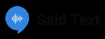

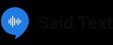

In [22]:
matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
        matching_results_image[3]["img_path"],
    ],
    resize_ratio=0.3,
)

In [23]:
%%time

print("\n **** Result: ***** \n")

instruction = f"""Answer the question and explain results with the given Image:
Question: {query}
Image:
"""

# Prepare the model input
model_input = [
    instruction,
    # passing all matched images to Gemini
    "Image:",
    matching_results_image[0]["image_object"],
    "Description:",
    matching_results_image[0]["image_description"],
    "Image:",
    matching_results_image[1]["image_object"],
    "Description:",
    matching_results_image[1]["image_description"],
    "Image:",
    matching_results_image[2]["image_object"],
    "Description:",
    matching_results_image[2]["image_description"],
    "Image:",
    matching_results_image[3]["image_object"],
    "Description:",
    matching_results_image[3]["image_description"],
]

# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=model_input,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: user 22.6 ms, sys: 0 ns, total: 22.6 ms
Wall time: 2.77 s


Based on the logo with the name "SaidText" and a speech bubble containing a soundwave, SaidText is likely used in  
the field of voice-to-text transcription or dictation.                                                             

Here's why:                                                                                                        

 • Speech Bubble: The speech bubble icon is a common symbol for communication, especially text messaging or chat.  
 • Soundwave: The soundwave inside the speech bubble signifies audio input.                                        

Therefore, SaidText likely converts spoken words into written text.

In [24]:
## you can check the citations to probe further.
## check the "image description:" which is a description extracted through Gemini which helped search our query.
rich_print(print_text_to_image_citation(matching_results_image, print_top=True))

Citation 1: Matched image path, page number and page text: 

score:  0.66
file_name:  saidtext_pitch_ita.pdf
path:  images/saidtext_pitch_ita.pdf_image_20_1_219.jpeg
page number:  21
page text:  Equity Story
Founders Equity
Investimento iniziale dei fondatori alla costituzione: 100.000
Pre-Seed Round
SaidText ha ottenuto un finanziamento pre-seed di 
188.000 euro da CDP Cassa Depositi e Prestiti, 
attraverso la selezione per l'esclusivo Programma di 
Accelerazione Forward Factory CDP, che ha avuto un 
tasso di accettazione competitivo dello 0,2% per le 
startup di manifattura digitale nel 2023.

image description:  The image shows the words "SaidText" next to a blue chat bubble icon. The icon contains a white outline of a soundwave. 



None

## Image Search

### Search similar image with image input [using multimodal image embeddings]

Imagine searching for images, but instead of typing words, you use an actual image as the clue.

Think of it like searching with a mini-map instead of a written address.
It's a different way to ask, "Show me more stuff like this".

So, instead of typing "various example of gemini 1.5 long context", you show a picture of that image and say, "Find me more like this"

For demonstration purposes, we will only be finding similar images that show the various features of Gemini in a single document below. However, you can scale this design pattern to match (find relevant images) across multiple documents.

In [ ]:
# You can find a similar image as per the images you have in the metadata.

image_query_path = "images/gemini_v1_5_report_technical.pdf_image_5_0_148.jpeg"

# Print a message indicating the input image
print("***Input image from user:***")

# Display the input image
Image.load_from_file(image_query_path)

You expect to find images that are similar in terms of "long context prompts for gemini 1.5 pro"

In [ ]:
# Search for Similar Images Based on Input Image and Image Embedding

matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,  # Use query text for additional filtering (optional)
    column_name="mm_embedding_from_img_only",  # Use image embedding for similarity calculation
    image_emb=True,
    image_query_path=image_query_path,  # Use input image for similarity calculation
    top_n=3,  # Retrieve top 3 matching images
    embedding_size=1408,  # Use embedding size of 1408
)

print("\n **** Result: ***** \n")

# Display the Top Matching Image
display(
    matching_results_image[0]["image_object"]
)  # Display the top matching image object (Pillow Image)


You can also print the citation to see what it has matched.

In [ ]:
# Display citation details for the top matching image
print_text_to_image_citation(
    matching_results_image, print_top=True
)  # Print citation details for the top matching image

In [ ]:
# Check Other Matched Images (Optional)
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
    ],
    resize_ratio=0.2,
)

The ability to identify similar text and images based on user input, using Gemini and embeddings, forms a crucial foundation for development of Multimodal Question Answering System with multimodal RAG design pattern, which you will explore in the coming sections.

### Comparative reasoning

Next, let's apply what you have done so far in doing comparative reasoning.

For this example:

* **Step 1:** You will search all the images for a specific query

* **Step 2:** Send those images to Gemini 1.5 Pro to ask multiple questions, where it has to compare among those images and provide you with answers.

In [ ]:
matching_results_image_query_1 = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query="Show me all the images that can describe LLMs and TPU v5e scaling",
    column_name="text_embedding_from_image_description",  # Use image description text embedding # mm_embedding_from_img_only text_embedding_from_image_description
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

In [ ]:
# Check Matched Images
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_query_1[0]["img_path"],
        matching_results_image_query_1[1]["img_path"],
        matching_results_image_query_1[2]["img_path"],
        matching_results_image_query_1[3]["img_path"],
        matching_results_image_query_1[4]["img_path"],
    ],
    resize_ratio=0.2,
)

In [ ]:
prompt = f"""Task: Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points.
Instructions:
1. Analyze the provided images focusing on the relationship between TPU v5e scaling efficiency, LLM model size growth, performance metrics, and quantization effects.
2. Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points
3. Cite the image sources to support your explanations. Mention the file name.

Additional Considerations:
* Clearly define any technical terms (e.g., EMFU, TFLOP/chip/s) within your answers for better understanding.
* Use specific examples and data points from the images to support your explanations.
* Feel free to request additional information or clarification if the images are unclear or ambiguous.

Question:
 - How does the scaling efficiency of TPU v5e compare to the overall growth in LLM model size over time?
 - How does the model size impact the observed Per-chip performance and EMFU for a fixed number of TPU v5e chips (e.g., 256)?
 - For the INT8 Quant training with 32B parameters, how does its high EMFU relate to the observed TFLOP/chip/s?
 - how does the "per device batch (seq)" for a 16B model compare to a 128B model, and how does this affect the "Total observed Perf"?
 - how might the MFU be impacted by increasing LLM model size?
"""

In [ ]:
%%time
# Generate response with Gemini 1.5 Pro
print("\n **** Result: ***** \n")
rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=[
            prompt,
            "Images:",
            matching_results_image_query_1[0]["image_object"],
            matching_results_image_query_1[1]["image_object"],
            matching_results_image_query_1[2]["image_object"],
            matching_results_image_query_1[3]["image_object"],
            matching_results_image_query_1[4]["image_object"],
        ],
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)

## Building Multimodal QA System with retrieval augmented generation (mRAG)

Let's bring everything together to implement multimodal RAG. You will use all the elements that you've explored in previous sections to implement the multimodal RAG. These are the steps:

* **Step 1:** The user gives a query in text format where the expected information is available in the document and is embedded in images and text.
* **Step 2:** Find all text chunks from the pages in the documents using a method similar to the one you explored in `Text Search`.
* **Step 3:** Find all similar images from the pages based on the user query matched with `image_description` using a method identical to the one you explored in `Image Search`.
* **Step 4:** Combine all similar text and images found in steps 2 and 3 as `context_text` and `context_images`.
* **Step 5:** With the help of Gemini, we can pass the user query with text and image context found in steps 2 & 3. You can also add a specific instruction the model should remember while answering the user query.
* **Step 6:** Gemini produces the answer, and you can print the citations to check all relevant text and images used to address the query.

### Step 1: User query

In [25]:
# this time we are not passing any images, but just a simple text query.

query = """Perche SaidText deve essere usato nel mondo manifatturiero?
 """

### Step 2: Get all relevant text chunks

In [26]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=20,
    chunk_text=True,
)

### Step 3: Get all relevant images

In [27]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

### Step 4: Create context_text and context_images

In [28]:
instruction = """Task: Answer the following questions in detail, providing clear reasoning and evidence from the images and text in bullet points.
Instructions:

1. **Analyze:** Carefully examine the provided images and text context.
2. **Synthesize:** Integrate information from both the visual and textual elements.
3. **Reason:**  Deduce logical connections and inferences to address the question.
4. **Respond:** Provide a concise, accurate answer in the following format:

   * **Question:** [Question]
   * **Answer:** [Direct response to the question]
   * **Explanation:** [Bullet-point reasoning steps if applicable]
   * **Source** [name of the file, page, image from where the information is citied]

5. **Ambiguity:** If the context is insufficient to answer, respond "Not enough context to answer."

"""

# combine all the selected relevant text chunks
context_text = ["Text Context: "]
for key, value in matching_results_chunks_data.items():
    context_text.extend(
        [
            "Text Source: ",
            f"""file_name: "{value["file_name"]}" Page: "{value["page_num"]}""",
            "Text",
            value["chunk_text"],
        ]
    )

# combine all the selected relevant images
gemini_content = [
    instruction,
    "Questions: ",
    query,
    "Image Context: ",
]
for key, value in matching_results_image_fromdescription_data.items():
    gemini_content.extend(
        [
            "Image Path: ",
            value["img_path"],
            "Image Description: ",
            value["image_description"],
            "Image:",
            value["image_object"],
        ]
    )
gemini_content.extend(context_text)

### Step 5: Pass context to Gemini

In [29]:
# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=gemini_content,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)

 • Question: Why should SaidText be used in the manufacturing world?                                               
 • Answer: SaidText should be used in the manufacturing world because it addresses specific industry challenges by 
   improving efficiency, communication, and data management.                                                       
 • Explanation:                                                                                                    
    • Manufacturing workers often spend a significant amount of their time writing reports or communicating issues,
      leading to inefficiencies. ("I lavoratori spendono fino al 50% del loro tempo scrivendo", Source:            
      saidtext_pitch_ita.pdf, Page 3)                                                                              
    • SaidText leverages AI-powered voice recognition to transcribe audio messages into text, reducing manual input
      and minimizing errors. (Source: saidtext_pitch_ita.pdf, Page 4)                                              
    • This voice-driven approach allows employees to manage tasks, communicate, and resolve problems hands-free,   
      ultimately boosting productivity. (Source: saidtext_pitch_ita.pdf, Page 7)                                   
    • The platform provides real-time updates on factory activities, facilitating timely decision-making for       
      managers. (Source: saidtext_pitch_ita.pdf, Page 4)                                                           
    • SaidText integrates with traditional ERP software, enabling workers to input data directly via voice, saving 
      time and reducing bottlenecks. (Source: saidtext_pitch_ita.pdf, Page 7)                                      
    • The platform offers specific benefits for areas like supply chain management, quality control, and issue     
      resolution. (Source: saidtext_pitch_ita.pdf, Page 7)                                                         
 • Source: saidtext_pitch_ita.pdf, Pages 3, 4, 7

### Step 6: Print citations and references [Optional]

**Optional:** Uncomment to see the detailed citations.

In [ ]:
# print("---------------Matched Images------------------\n")
# display_images(
#     [
#         matching_results_image_fromdescription_data[0]["img_path"],
#         matching_results_image_fromdescription_data[1]["img_path"],
#     ],
#     resize_ratio=0.2,
# )

In [ ]:
# # Image citations. You can check how Gemini generated metadata helped in grounding the answer.

# print_text_to_image_citation(
#     matching_results_image_fromdescription_data, print_top=True
# )

In [ ]:
# # Text citations

# print_text_to_text_citation(
#     matching_results_chunks_data,
#     print_top=True,
#     chunk_text=True,
# )

### Multimodal RAG

### More questions with Multimodal QA System

In [30]:
# Some questions to try
# this time we are not passing any images, but just a simple text query.
query = """Question 1: Where SaidText can be used?

Question 2: Why SaidText is important in production environment?

Question 3:  What is the future of SaidText?
 """

(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_15,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

 • Question: Where SaidText can be used?                                                                           
 • Answer: SaidText can be used in industrial environments and for customer care applications.                     
 • Explanation:                                                                                                    
    • SaidText is designed to redefine communication in industrial environments. (saidtext_pitch_ita.pdf, Page 4)  
    • SaidText can be used to create white-label customer care applications. (saidtext_pitch_ita.pdf, Page 9)      
 • Source: saidtext_pitch_ita.pdf, Page 4, 9                                                                       
 • Question: Why SaidText is important in production environment?                                                  
 • Answer: SaidText is important in production environments because it improves operational efficiency and boosts  
   productivity by enabling hands-free communication, reducing manual data entry, minimizing errors, and providing 
   real-time updates for better decision-making.                                                                   
 • Explanation:                                                                                                    
    • SaidText uses AI-powered speech recognition to convert voice communications into text, eliminating the need  
      for manual input. (saidtext_pitch_ita.pdf, Page 4, 11)                                                       
    • This hands-free approach reduces errors and allows workers to focus on their tasks. (saidtext_pitch_ita.pdf, 
      Page 4)                                                                                                      
    • Real-time updates on factory activities facilitate timely decision-making. (saidtext_pitch_ita.pdf, Page 4)  
 • Source: saidtext_pitch_ita.pdf, Page 4, 11                                                                      
 • Question:  What is the future of SaidText?                                                                      
 • Answer: SaidText is actively developing its product with new features like voice chat, multi-site labels,       
   improved mobile apps, ERP integrations, AI-powered auto-labeling, and plans to expand its market reach.         
 • Explanation:                                                                                                    
    • The provided roadmap outlines future developments, including product enhancements, marketing initiatives, and
      hiring plans. (saidtext_pitch_ita.pdf, Page 22)                                                              
    • These efforts indicate a strong focus on growth and innovation. (saidtext_pitch_ita.pdf, Page 22)            
 • Source: saidtext_pitch_ita.pdf, Page 22

In [31]:
# Some questions to try

query = """How SaidText can help measuring lead-time in processes?

Question 2: What should be improved in SaidText? Be creative.

Question 3: What is the story of SaidText?
"""
(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_15,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

SaidText Analysis                                                 

Question 1: How SaidText can help measuring lead-time in processes?                                                

Answer: Not enough context to answer.                                                                              

Explanation:                                                                                                       

 • While the text mentions SaidText improves operational efficiency, there's no direct mention of measuring        
   lead-time in processes.                                                                                         
 • More information is needed about how SaidText integrates with existing systems or tracks time-stamped data      
   within processes.                                                                                               

Source: N/A                                                                                                        

Question 2: What should be improved in SaidText? Be creative.                                                      

Answer:  Several improvements could enhance SaidText's functionality:                                              

 • Real-time language translation:  For global companies, integrating real-time translation within the             
   voice-to-text feature would break down language barriers.                                                       
 • Voice command integration: Allow users to execute basic commands within the platform using voice, like "Assign  
   to John" or "Mark as urgent."                                                                                   
 • Sentiment analysis: Incorporate sentiment analysis into the transcribed text to gauge customer emotions and     
   prioritize urgent issues.                                                                                       
 • AI-powered suggestions for resolutions: Based on the transcribed text and historical data, offer AI-powered     
   suggestions to agents for common problems.                                                                      
 • Offline mode with synchronization: Allow users to record audio in areas with poor connectivity and sync the data
   later.                                                                                                          
 • Integration with project management tools:  Enable seamless integration with popular tools like Asana or Jira   
   for task creation and progress tracking.                                                                        

Explanation:  These suggestions enhance communication, efficiency, and analytical capabilities within SaidText.    

Source:  N/A                                                                                                       

Question 3: What is the story of SaidText?                                                                         

Answer:  SaidText is a SaaS platform utilizing AI-driven voice recognition to redefine communication within        
industrial settings.                                                                                               

Explanation:                                                                                                       

 • Problem: The manufacturing industry faces challenges like inefficient text-based communication, leading to      
   errors, bottlenecks, and increased costs.  ("saidtext_pitch_ita.pdf", Page 3)                                   
 • Solution: SaidText enables hands-free communication by converting audio to text, allowing workers to focus on   
   tasks and input data using voice. This improves efficiency, minimizes errors, and provides real-time insights   
   into factory floor activities. ("saidtext_pitch_ita.pdf", Pages 4, 7)                                           
 • Applications: SaidText is applicable for industrial workflows, customer care through whi

## Conclusions

Congratulations on making it through this multimodal RAG notebook!

While multimodal RAG can be quite powerful, note that it can face some limitations:

* **Data dependency:** Needs high-quality paired text and visuals.
* **Computationally demanding:** Processing multimodal data is resource-intensive.
* **Domain specific:** Models trained on general data may not shine in specialized fields like medicine.
* **Black box:** Understanding how these models work can be tricky, hindering trust and adoption.


Despite these challenges, multimodal RAG represents a significant step towards search and retrieval systems that can handle diverse, multimodal data.